In [2]:
import pandas as pd
import numpy as np
from numpy import array
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.layers import InputLayer
from tensorflow.keras.layers import Input
from random import randrange
import random
from tqdm import tqdm
from array import array
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
import io
import matplotlib.pyplot as plt
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical


One common approach to sequential series prediction is to use a type of recurrent neural network (RNN) called a long short-term memory (LSTM) network or a gated recurrent unit (GRU) network.

In [25]:
data = pd.read_csv('Italia-positivi-giornaliero.csv')

In [26]:
data = data.totale_positivi.values.tolist()

In [6]:
def sequence_split(sequence, n):
    from numpy import array
    X,y  = list(),list()
    for i in range(len(sequence)):
        end_ix = i + n  
        if end_ix > len(sequence)-1: 
            break
        seq_x, seq_y = sequence[i:end_ix],sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [ ]:
X,y = sequence_split(data, 10)

In [29]:
for i in X:
  print(i)

[ 221  311  385  588  821 1049 1577 1835 2263 2706]
[ 311  385  588  821 1049 1577 1835 2263 2706 3296]
[ 385  588  821 1049 1577 1835 2263 2706 3296 3916]
[ 588  821 1049 1577 1835 2263 2706 3296 3916 5061]
[ 821 1049 1577 1835 2263 2706 3296 3916 5061 6387]
[1049 1577 1835 2263 2706 3296 3916 5061 6387 7985]
[1577 1835 2263 2706 3296 3916 5061 6387 7985 8514]
[ 1835  2263  2706  3296  3916  5061  6387  7985  8514 10590]
[ 2263  2706  3296  3916  5061  6387  7985  8514 10590 12839]
[ 2706  3296  3916  5061  6387  7985  8514 10590 12839 14955]
[ 3296  3916  5061  6387  7985  8514 10590 12839 14955 17750]
[ 3916  5061  6387  7985  8514 10590 12839 14955 17750 20603]
[ 5061  6387  7985  8514 10590 12839 14955 17750 20603 23073]
[ 6387  7985  8514 10590 12839 14955 17750 20603 23073 26062]
[ 7985  8514 10590 12839 14955 17750 20603 23073 26062 28710]
[ 8514 10590 12839 14955 17750 20603 23073 26062 28710 33190]
[10590 12839 14955 17750 20603 23073 26062 28710 33190 37860]
[12839 14955 177

In [30]:
# IMPLEMENTING MLP WITH THE ITALIA-POSITIVI DATASET

In [22]:
MLP = Sequential()
MLP.add(Dense(50, activation = 'relu' , input_dim = 10))
MLP.add(Dense(1))
# MLP.add(Dense(128, activation = 'relu'))

MLP.compile(optimizer = 'adam', loss = 'mse')
MLP.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                550       
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [47]:
history = MLP.fit(X,y, epochs = 600, batch_size = 128) # Fitting our data to the model

Epoch 1/600
5/5 [==============================] - 0s 5ms/step - loss: 34357496.0000
Epoch 2/600
5/5 [==============================] - 0s 4ms/step - loss: 34338660.0000
Epoch 3/600
5/5 [==============================] - 0s 6ms/step - loss: 34651820.0000
Epoch 4/600
5/5 [==============================] - 0s 8ms/step - loss: 34365776.0000
Epoch 5/600
5/5 [==============================] - 0s 9ms/step - loss: 34469340.0000
Epoch 6/600
5/5 [==============================] - 0s 10ms/step - loss: 34180360.0000
Epoch 7/600
5/5 [==============================] - 0s 7ms/step - loss: 34582628.0000
Epoch 8/600
5/5 [==============================] - 0s 7ms/step - loss: 34196396.0000
Epoch 9/600
5/5 [==============================] - 0s 6ms/step - loss: 34277712.0000
Epoch 10/600
5/5 [==============================] - 0s 5ms/step - loss: 34947000.0000
Epoch 11/600
5/5 [==============================] - 0s 10ms/step - loss: 35929288.0000
Epoch 12/600
5/5 [==============================] - 0s 8ms/st

In [52]:
# making a prediction using the following values
pred_data = np.array([102859, 106920, 110659, 115112, 119230, 120875, 123396, 127085, 132513, 137130])
pred_data = pred_data.reshape(1,X.shape[1])
y_hat = MLP.predict(pred_data, verbose=0)

In [56]:
print("Predicted Value",y_hat)  # printing our predicted value


Predicted Value [[138710.2]]


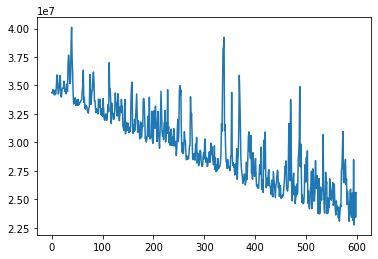

In [57]:
plt.plot(history.history['loss'])

In [ ]:
# THE PI DATASET

In [13]:
# Experimenting on MobyDict dataset

In [15]:
trend_data = pd.read_csv('Italia-trend-giornaliero.csv')


In [16]:
trend_data.drop(trend_data.columns[2:], axis=1, inplace=True)

In [17]:
trend_data.dtypes

data          object
ricoverati     int64
dtype: object

In [18]:
trend_data

,data,ricoverati
0,2/24/2020,101
1,2/25/2020,114
2,2/26/2020,128
3,2/27/2020,248
4,2/28/2020,345
...,...,...
635,11/20/2021,4250
636,11/21/2021,4345
637,11/22/2021,4507
638,11/23/2021,4597


In [19]:
trend_data = trend_data.ricoverati.values.tolist()

In [23]:
X_trend,y_trend = sequence_split(trend_data, 10)

In [24]:
for x in X_trend: 
  print(x)

[ 101  114  128  248  345  401  639  742 1034 1346]
[ 114  128  248  345  401  639  742 1034 1346 1790]
[ 128  248  345  401  639  742 1034 1346 1790 2394]
[ 248  345  401  639  742 1034 1346 1790 2394 2651]
[ 345  401  639  742 1034 1346 1790 2394 2651 3557]
[ 401  639  742 1034 1346 1790 2394 2651 3557 4316]
[ 639  742 1034 1346 1790 2394 2651 3557 4316 5038]
[ 742 1034 1346 1790 2394 2651 3557 4316 5038 5838]
[1034 1346 1790 2394 2651 3557 4316 5038 5838 6650]
[1346 1790 2394 2651 3557 4316 5038 5838 6650 7426]
[1790 2394 2651 3557 4316 5038 5838 6650 7426 8372]
[2394 2651 3557 4316 5038 5838 6650 7426 8372 9663]
[ 2651  3557  4316  5038  5838  6650  7426  8372  9663 11025]
[ 3557  4316  5038  5838  6650  7426  8372  9663 11025 12894]
[ 4316  5038  5838  6650  7426  8372  9663 11025 12894 14363]
[ 5038  5838  6650  7426  8372  9663 11025 12894 14363 15757]
[ 5838  6650  7426  8372  9663 11025 12894 14363 15757 16020]
[ 6650  7426  8372  9663 11025 12894 14363 15757 16020 17708]
[ 74

In [25]:
history = MLP.fit(X_trend,y_trend, epochs = 200, batch_size = 128) # Fitting our data to the model

Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 151662.6250
Epoch 2/200
5/5 [==============================] - 0s 3ms/step - loss: 153062.0312
Epoch 3/200
5/5 [==============================] - 0s 3ms/step - loss: 153847.4531
Epoch 4/200
5/5 [==============================] - 0s 3ms/step - loss: 154240.9062
Epoch 5/200
5/5 [==============================] - 0s 3ms/step - loss: 154273.3281
Epoch 6/200
5/5 [==============================] - 0s 3ms/step - loss: 154131.9375
Epoch 7/200
5/5 [==============================] - 0s 4ms/step - loss: 153888.9062
Epoch 8/200
5/5 [==============================] - 0s 3ms/step - loss: 153597.0469
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 153275.5781
Epoch 10/200
5/5 [==============================] - 0s 3ms/step - loss: 152941.0000
Epoch 11/200
5/5 [==============================] - 0s 3ms/step - loss: 152610.8906
Epoch 12/200
5/5 [==============================] - 0s 3ms/step - loss: 152240.6562
E

In [26]:
pred_data = np.array([3525, 3597 ,3647, 3808 ,3970, 4060, 4088 ,4145 ,4250 ,4345]) # making a prediction
pred_data = pred_data.reshape(1,X_trend.shape[1])
y_hat = MLP.predict(pred_data, verbose=0)
y_hat

array([[4412.58]], dtype=float32)

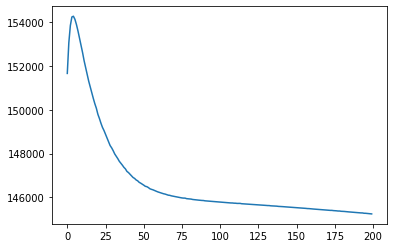

In [27]:
plt.plot(history.history['loss'])

In [ ]:
# Implementing the MobyDict Dataset 

In [60]:
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Embedding
from numpy import array

In [61]:
# file = open("MobyDick.txt", mode="r")

In [88]:
moby_data = """ It had cooled and crystallized to such a degree, that when, with several others, I sat down before a large Constantine’s bath of it, I found it strangely concreted into lumps, here and there rolling about in the liquid part. It was our business to squeeze these lumps backinto fluid. /n
A sweet and unctuous duty! No wonder that in old times this sperm was such a favourite cosmetic. /n
Such a clearer! such a sweetener! such a softener! such a delicious molifier! After having my hands in it for only a few minutes, my fingers felt like eels, and began, as it were, to serpentine and spiralise. /n
As I sat there at my ease, cross-legged on the deck; after the bitter exertion at the windlass; under a blue tranquil sky; the ship under indolent sail, and gliding so serenely along; /n
as I bathed my hands among those soft, gentle globules of infiltrated tissues, woven almost within the hour; as they richly broke to my fingers, and discharged all their opulence, like fully ripe grapes their wine; /n
as I snuffed up that uncontaminated aroma,—literally and truly, like the smell of spring violets; /n
I declare to you, that for the time I lived as in a musky meadow; /n
I forgot all about our horrible oath; in that inexpressible sperm, I washed my hands and my heart of it; /n
I almost began to credit the old Paracelsan superstition that sperm is of rare virtue in allaying the heat of anger; while bathing in that bath, I felt divinely free from all ill-will, or petulance, or malice, of any sort whatsoever.
\n """

In [89]:
# We convert all this the words into numbers by fitting  in the texts
tokenizer = Tokenizer()
tokenizer.fit_on_texts([moby_data])
encoded_data = tokenizer.texts_to_sequences([moby_data])[0]
encoded_data

[6,
 36,
 37,
 4,
 38,
 11,
 12,
 1,
 39,
 7,
 40,
 41,
 42,
 43,
 2,
 18,
 44,
 45,
 1,
 46,
 47,
 19,
 8,
 6,
 2,
 48,
 6,
 49,
 50,
 51,
 20,
 52,
 4,
 21,
 53,
 22,
 9,
 3,
 54,
 55,
 6,
 23,
 24,
 56,
 11,
 57,
 58,
 20,
 59,
 60,
 5,
 1,
 61,
 4,
 62,
 63,
 64,
 65,
 7,
 9,
 25,
 66,
 67,
 14,
 23,
 12,
 1,
 68,
 69,
 5,
 12,
 1,
 70,
 12,
 1,
 71,
 12,
 1,
 72,
 12,
 1,
 73,
 74,
 26,
 75,
 10,
 15,
 9,
 6,
 27,
 76,
 1,
 77,
 78,
 10,
 28,
 29,
 16,
 79,
 4,
 30,
 13,
 6,
 80,
 11,
 81,
 4,
 82,
 5,
 13,
 2,
 18,
 21,
 31,
 10,
 83,
 84,
 85,
 86,
 3,
 87,
 26,
 3,
 88,
 89,
 31,
 3,
 90,
 32,
 1,
 91,
 92,
 93,
 3,
 94,
 32,
 95,
 96,
 4,
 97,
 98,
 99,
 100,
 5,
 13,
 2,
 101,
 10,
 15,
 102,
 103,
 104,
 105,
 106,
 8,
 107,
 108,
 109,
 33,
 110,
 3,
 111,
 13,
 112,
 113,
 114,
 11,
 10,
 28,
 4,
 115,
 17,
 34,
 116,
 16,
 117,
 118,
 119,
 34,
 120,
 5,
 13,
 2,
 121,
 122,
 7,
 123,
 124,
 125,
 4,
 126,
 16,
 3,
 127,
 8,
 128,
 129,
 5,
 2,
 130,
 11,
 131,
 7,
 27,
 

In [90]:
text_size = len(tokenizer.word_index) + 1
text_size

163

In [91]:
from keras.utils.timeseries_dataset import sequences_from_indices
# Creating a sequence of words to fit the model with input and output datas

sequences = list() # creating an empty list
for i in range(1, len(encoded_data)):
  sequence = encoded_data[i-1:i+1]
  sequences.append(sequence)
print("The length of the sequence is: ",len(sequences))
sequences

The length of the sequence is:  276


[[6, 36],
 [36, 37],
 [37, 4],
 [4, 38],
 [38, 11],
 [11, 12],
 [12, 1],
 [1, 39],
 [39, 7],
 [7, 40],
 [40, 41],
 [41, 42],
 [42, 43],
 [43, 2],
 [2, 18],
 [18, 44],
 [44, 45],
 [45, 1],
 [1, 46],
 [46, 47],
 [47, 19],
 [19, 8],
 [8, 6],
 [6, 2],
 [2, 48],
 [48, 6],
 [6, 49],
 [49, 50],
 [50, 51],
 [51, 20],
 [20, 52],
 [52, 4],
 [4, 21],
 [21, 53],
 [53, 22],
 [22, 9],
 [9, 3],
 [3, 54],
 [54, 55],
 [55, 6],
 [6, 23],
 [23, 24],
 [24, 56],
 [56, 11],
 [11, 57],
 [57, 58],
 [58, 20],
 [20, 59],
 [59, 60],
 [60, 5],
 [5, 1],
 [1, 61],
 [61, 4],
 [4, 62],
 [62, 63],
 [63, 64],
 [64, 65],
 [65, 7],
 [7, 9],
 [9, 25],
 [25, 66],
 [66, 67],
 [67, 14],
 [14, 23],
 [23, 12],
 [12, 1],
 [1, 68],
 [68, 69],
 [69, 5],
 [5, 12],
 [12, 1],
 [1, 70],
 [70, 12],
 [12, 1],
 [1, 71],
 [71, 12],
 [12, 1],
 [1, 72],
 [72, 12],
 [12, 1],
 [1, 73],
 [73, 74],
 [74, 26],
 [26, 75],
 [75, 10],
 [10, 15],
 [15, 9],
 [9, 6],
 [6, 27],
 [27, 76],
 [76, 1],
 [1, 77],
 [77, 78],
 [78, 10],
 [10, 28],
 [28, 29],

In [92]:
# Splitting the data into input and output

In [93]:
sequences = np.array(sequences)
inp, outp = sequences[:,0], sequences[:,1]

In [94]:
inp[:10],outp[:10]

(array([ 6, 36, 37,  4, 38, 11, 12,  1, 39,  7]),
 array([36, 37,  4, 38, 11, 12,  1, 39,  7, 40]))

In [95]:
outp = to_categorical(outp, num_classes=text_size) # creating a one hot encoding
outp[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [96]:
# Building our model

In [103]:
model = Sequential()
model.add(Embedding(text_size, 50, input_length=1))
model.add(LSTM(50))
model.add(Dense(text_size, activation = 'softmax'))
# model.add(Dense(10))
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 1, 50)             8150      
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_21 (Dense)            (None, 163)               8313      
                                                                 
Total params: 36,663
Trainable params: 36,663
Non-trainable params: 0
_________________________________________________________________


In [104]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [105]:
model.fit(inp, outp, epochs=200)

Epoch 1/200
9/9 [==============================] - 2s 4ms/step - loss: 5.0933 - accuracy: 0.0145 
Epoch 2/200
9/9 [==============================] - 0s 5ms/step - loss: 5.0871 - accuracy: 0.0942
Epoch 3/200
9/9 [==============================] - 0s 4ms/step - loss: 5.0821 - accuracy: 0.1123
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 5.0764 - accuracy: 0.1232
Epoch 5/200
9/9 [==============================] - 0s 4ms/step - loss: 5.0700 - accuracy: 0.1486
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 5.0627 - accuracy: 0.1667
Epoch 7/200
9/9 [==============================] - 0s 5ms/step - loss: 5.0537 - accuracy: 0.1848
Epoch 8/200
9/9 [==============================] - 0s 4ms/step - loss: 5.0425 - accuracy: 0.1812
Epoch 9/200
9/9 [==============================] - 0s 4ms/step - loss: 5.0285 - accuracy: 0.1884
Epoch 10/200
9/9 [==============================] - 0s 4ms/step - loss: 5.0102 - accuracy: 0.2101
Epoch 11/200
9/9 [==========

In [106]:
#  generating a sequence from the model

def generate_seg(model, tokenizer, enter_text, n_pred):
  in_text, result = enter_text, enter_text
  for _ in range(n_pred):
    encoded = tokenizer.texts_to_sequences([in_text])[0]
    encoded = array(encoded)

    y_pred = model.predict(encoded).any()
    out_word = ''
    for word, index in tokenizer.word_index.items():
      if index == y_pred:
        out_word = word
        break
    in_text, result = out_word, result + ' ' + out_word
    return result




In [107]:
print(generate_seg(model, tokenizer, 'bitter', 5))

1/1 [==============================] - 1s 762ms/step
bitter a


In [58]:
# MLP WITH MOBY-DICK DATASET

In [42]:
# Implementing the Covid Dataset

In [44]:
covid_data = pd.read_csv('TotalPositiveVariation.csv')
covid_data

,variazione_totale_positivi
0,0
1,90
2,74
3,203
4,233
...,...
635,6271
636,5359
637,2754
638,2996


In [45]:
covid_data = covid_data.variazione_totale_positivi.values.tolist()
covid_data

[0,
 90,
 74,
 203,
 233,
 228,
 528,
 258,
 428,
 443,
 590,
 620,
 1145,
 1326,
 1598,
 529,
 2076,
 2249,
 2116,
 2795,
 2853,
 2470,
 2989,
 2648,
 4480,
 4670,
 4821,
 3957,
 3780,
 3612,
 3491,
 4492,
 4401,
 3651,
 3815,
 1648,
 2107,
 2937,
 2477,
 2339,
 2886,
 2972,
 1941,
 880,
 1195,
 1615,
 1396,
 1996,
 1984,
 1363,
 675,
 1127,
 1189,
 355,
 809,
 486,
 -20,
 -528,
 -10,
 -851,
 -321,
 -680,
 256,
 -290,
 -608,
 -548,
 -3106,
 -608,
 -239,
 -525,
 -199,
 -1513,
 -6939,
 -1904,
 -1663,
 -3119,
 -1518,
 -836,
 -1222,
 -2809,
 -2017,
 -4370,
 -1883,
 -1836,
 -1798,
 -1424,
 -2377,
 -1792,
 -1638,
 -1570,
 -1158,
 -1294,
 -2358,
 -1976,
 -2980,
 -1811,
 -2484,
 -1594,
 -730,
 -1474,
 -596,
 -868,
 -1453,
 -1099,
 -615,
 -532,
 -1858,
 -1162,
 -1073,
 -1640,
 -1512,
 -1211,
 -365,
 -1340,
 -644,
 -824,
 -1558,
 -331,
 -240,
 -335,
 -1064,
 -918,
 -352,
 -665,
 -802,
 -155,
 -185,
 -933,
 -308,
 -195,
 -176,
 -263,
 21,
 67,
 -467,
 -647,
 -136,
 -31,
 -125,
 -124,
 -22,
 -238

In [46]:
covid_X,covid_y = sequence_split(covid_data, 10)

In [47]:
covid_X

array([[   0,   90,   74, ...,  258,  428,  443],
       [  90,   74,  203, ...,  428,  443,  590],
       [  74,  203,  233, ...,  443,  590,  620],
       ...,
       [3739, 4453, 4118, ..., 4617, 6271, 5359],
       [4453, 4118, 1645, ..., 6271, 5359, 2754],
       [4118, 1645, 2521, ..., 5359, 2754, 2996]])

In [48]:
for cov in covid_X:
  print(cov)

[  0  90  74 203 233 228 528 258 428 443]
[ 90  74 203 233 228 528 258 428 443 590]
[ 74 203 233 228 528 258 428 443 590 620]
[ 203  233  228  528  258  428  443  590  620 1145]
[ 233  228  528  258  428  443  590  620 1145 1326]
[ 228  528  258  428  443  590  620 1145 1326 1598]
[ 528  258  428  443  590  620 1145 1326 1598  529]
[ 258  428  443  590  620 1145 1326 1598  529 2076]
[ 428  443  590  620 1145 1326 1598  529 2076 2249]
[ 443  590  620 1145 1326 1598  529 2076 2249 2116]
[ 590  620 1145 1326 1598  529 2076 2249 2116 2795]
[ 620 1145 1326 1598  529 2076 2249 2116 2795 2853]
[1145 1326 1598  529 2076 2249 2116 2795 2853 2470]
[1326 1598  529 2076 2249 2116 2795 2853 2470 2989]
[1598  529 2076 2249 2116 2795 2853 2470 2989 2648]
[ 529 2076 2249 2116 2795 2853 2470 2989 2648 4480]
[2076 2249 2116 2795 2853 2470 2989 2648 4480 4670]
[2249 2116 2795 2853 2470 2989 2648 4480 4670 4821]
[2116 2795 2853 2470 2989 2648 4480 4670 4821 3957]
[2795 2853 2470 2989 2648 4480 4670 4821 3

In [49]:
covid_history = MLP.fit(covid_X,covid_y, epochs = 100, batch_size = 128) # Fitting our data to the model

Epoch 1/100
5/5 [==============================] - 0s 3ms/step - loss: 20096296.0000
Epoch 2/100
5/5 [==============================] - 0s 3ms/step - loss: 16981278.0000
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 15137267.0000
Epoch 4/100
5/5 [==============================] - 0s 3ms/step - loss: 14124733.0000
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 13653728.0000
Epoch 6/100
5/5 [==============================] - 0s 3ms/step - loss: 13355435.0000
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 13112069.0000
Epoch 8/100
5/5 [==============================] - 0s 3ms/step - loss: 12814931.0000
Epoch 9/100
5/5 [==============================] - 0s 3ms/step - loss: 12435627.0000
Epoch 10/100
5/5 [==============================] - 0s 3ms/step - loss: 12308409.0000
Epoch 11/100
5/5 [==============================] - 0s 3ms/step - loss: 12259252.0000
Epoch 12/100
5/5 [==============================] - 0s 4ms/step

In [50]:
pred_data = np.array([3739 ,4453, 4118, 1645 ,2521 ,3689, 5428, 4617, 6271 ,5359]) # making a prediction
pred_data = pred_data.reshape(1,covid_X.shape[1])
y_hat = MLP.predict(pred_data, verbose=0)
y_hat

array([[3786.0417]], dtype=float32)

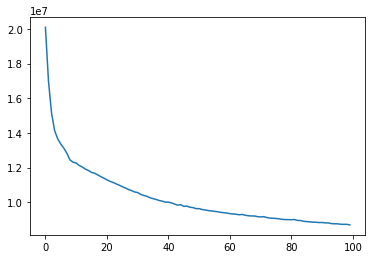

In [51]:
plt.plot(covid_history.history['loss'])

In [52]:
# Question 2 IMPLEMENTING THE ABOVE IN RNN 

4/4 [==============================] - 0s 4ms/step


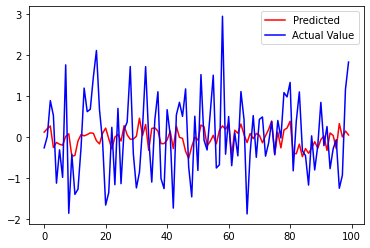

In [108]:

def generate_dataset(time_steps, num_examples, input_dim, output_dim):
    X = np.random.randn(num_examples, time_steps, input_dim)
    y = np.random.randn(num_examples, output_dim)
    return X, y

# Define the LSTM model
def build_model(time_steps, input_dim, output_dim):
    model = Sequential()
    model.add(LSTM(32, input_shape=(time_steps, input_dim)))
    model.add(Dense(output_dim))
    return model

# Generate the dataset
time_steps = 10
input_dim = 1
output_dim = 1
X, y = generate_dataset(time_steps, 100, input_dim, output_dim)

# Build and compile the model
model = build_model(time_steps, input_dim, output_dim)
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the data
history = model.fit(X, y, epochs=100, verbose=0)

# Predict the output
predictions = model.predict(X)

# Plot the predicted values
plt.plot(predictions, 'r', label='Predicted')
plt.plot(y, 'b', label='Actual Value')
plt.legend()
plt.show()


In [54]:
X,y = sequence_split(data, 10)

In [55]:
for values in X:
  print(values)

[ 221  311  385  588  821 1049 1577 1835 2263 2706]
[ 311  385  588  821 1049 1577 1835 2263 2706 3296]
[ 385  588  821 1049 1577 1835 2263 2706 3296 3916]
[ 588  821 1049 1577 1835 2263 2706 3296 3916 5061]
[ 821 1049 1577 1835 2263 2706 3296 3916 5061 6387]
[1049 1577 1835 2263 2706 3296 3916 5061 6387 7985]
[1577 1835 2263 2706 3296 3916 5061 6387 7985 8514]
[ 1835  2263  2706  3296  3916  5061  6387  7985  8514 10590]
[ 2263  2706  3296  3916  5061  6387  7985  8514 10590 12839]
[ 2706  3296  3916  5061  6387  7985  8514 10590 12839 14955]
[ 3296  3916  5061  6387  7985  8514 10590 12839 14955 17750]
[ 3916  5061  6387  7985  8514 10590 12839 14955 17750 20603]
[ 5061  6387  7985  8514 10590 12839 14955 17750 20603 23073]
[ 6387  7985  8514 10590 12839 14955 17750 20603 23073 26062]
[ 7985  8514 10590 12839 14955 17750 20603 23073 26062 28710]
[ 8514 10590 12839 14955 17750 20603 23073 26062 28710 33190]
[10590 12839 14955 17750 20603 23073 26062 28710 33190 37860]
[12839 14955 177

In [56]:
from keras.layers import RNN, SimpleRNN
from keras.models import Sequential

# define the model
RNN = Sequential()
RNN.add(SimpleRNN(50, input_shape=(None, 1)))

# compile the model
RNN.compile(optimizer='adam', loss='mean_squared_error')

# fit the model to the data
history = RNN.fit(X, y, epochs=200)

Epoch 1/200
20/20 [==============================] - 1s 4ms/step - loss: 101992816640.0000
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 101992833024.0000
Epoch 3/200
20/20 [==============================] - 0s 4ms/step - loss: 101992833024.0000
Epoch 4/200
20/20 [==============================] - 0s 3ms/step - loss: 101992833024.0000
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 101992833024.0000
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 101992824832.0000
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 101992833024.0000
Epoch 8/200
20/20 [==============================] - 0s 3ms/step - loss: 101992833024.0000
Epoch 9/200
20/20 [==============================] - 0s 4ms/step - loss: 101992833024.0000
Epoch 10/200
20/20 [==============================] - 0s 4ms/step - loss: 101992833024.0000
Epoch 11/200
20/20 [==============================] - 0s 3ms/step - loss: 101992833024.00

In [60]:
pred_data = np.array([110659, 115112, 119230 ,120875, 123396, 127085 ,132513, 137130, 143401 ,148760]) # making a prediction
pred_data = pred_data.reshape(1,X.shape[1])
y_hat = RNN.predict(pred_data, verbose=0)


20/20 [==============================] - 0s 2ms/step


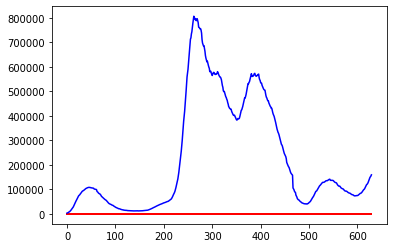

In [64]:
predictions = RNN.predict(X)

# Plot the predicted values
plt.plot(predictions, 'r', label='Predicted')
plt.plot(y, 'b', label='Actual Value')
# plt.legend()
plt.show()


20/20 [==============================] - 0s 7ms/step


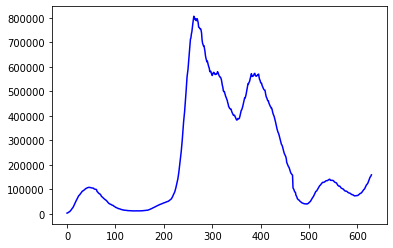

In [62]:
predictions = RNN.predict(X)

# Plot the predicted values
plt.plot(y_hat, 'r', label='Predicted')
plt.plot(y, 'b', label='Actual Value')
# plt.legend()
plt.show()


In [65]:
# Implementing LSTM 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Load the dataset
df = pd.read_csv('Italia-trend-giornaliero.csv',parse_dates = ['data'], index_col = ['data'])
df.drop(df.columns[2:], axis=1, inplace=True)

# Normalize the data
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# Split the data into train and test sets
split_index = int(len(df) * 0.8)
x_train, y_train = df[:split_index, :-1], df[:split_index, -1]
x_test, y_test = df[split_index:, :-1], df[split_index:, -1]

# Reshape the data for the LSTM
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

# Build the model
model = Sequential()
model.add(LSTM(64, input_shape=(1, x_train.shape[2])))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
trend_history = model.fit(x_train, y_train, epochs=100, batch_size=16, validation_data=(x_test, y_test), verbose=2, shuffle=False)

# Make predictions on the test data
predictions = model.predict(x_test)



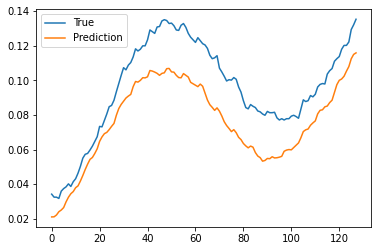

In [110]:


# Plot the results
plt.plot(y_test, label='True')
plt.plot(predictions[:, 0], label='Prediction')
plt.legend()
plt.show()

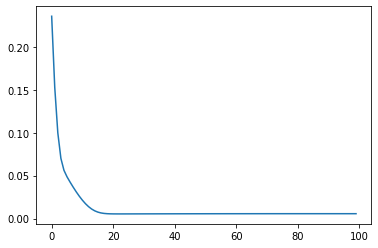

In [73]:
plt.plot(trend_history.history['loss'])

In [74]:
# Implementing GRU

In [99]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense

df = pd.read_csv('Italia-trend-giornaliero.csv',parse_dates = ['data'], index_col = ['data'])
df.drop(df.columns[2:], axis=1, inplace=True)


# Normalize the data
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# Split the data into train and test sets
split_index = int(len(df) * 0.8)
x_train, y_train = df[:split_index, :-1], df[:split_index, -1]
x_test, y_test = df[split_index:, :-1], df[split_index:, -1]

# Reshape the data for the GRU
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

# Build the model
model = Sequential()
model.add(GRU(64, input_shape=(1, x_train.shape[2])))
model.add(Dense(1))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

# Fit the model to the training data
trend_hist = model.fit(x_train, y_train, epochs=100, batch_size=16,validation_data=(x_test, y_test), verbose=2, shuffle=False)


Epoch 1/100
32/32 - 2s - loss: 5.9823 - accuracy: 0.0020 - val_loss: 1.4713 - val_accuracy: 0.0000e+00 - 2s/epoch - 66ms/step
Epoch 2/100
32/32 - 0s - loss: 5.9823 - accuracy: 0.0020 - val_loss: 1.4713 - val_accuracy: 0.0000e+00 - 97ms/epoch - 3ms/step
Epoch 3/100
32/32 - 0s - loss: 5.9823 - accuracy: 0.0020 - val_loss: 1.4713 - val_accuracy: 0.0000e+00 - 86ms/epoch - 3ms/step
Epoch 4/100
32/32 - 0s - loss: 5.9823 - accuracy: 0.0020 - val_loss: 1.4713 - val_accuracy: 0.0000e+00 - 94ms/epoch - 3ms/step
Epoch 5/100
32/32 - 0s - loss: 5.9823 - accuracy: 0.0020 - val_loss: 1.4713 - val_accuracy: 0.0000e+00 - 97ms/epoch - 3ms/step
Epoch 6/100
32/32 - 0s - loss: 5.9823 - accuracy: 0.0020 - val_loss: 1.4713 - val_accuracy: 0.0000e+00 - 102ms/epoch - 3ms/step
Epoch 7/100
32/32 - 0s - loss: 5.9823 - accuracy: 0.0020 - val_loss: 1.4713 - val_accuracy: 0.0000e+00 - 90ms/epoch - 3ms/step
Epoch 8/100
32/32 - 0s - loss: 5.9823 - accuracy: 0.0020 - val_loss: 1.4713 - val_accuracy: 0.0000e+00 - 91ms/e

4/4 [==============================] - 0s 3ms/step


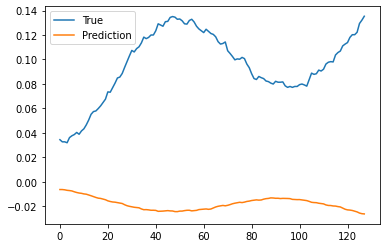

In [100]:
# Make predictions on the test data
predictions = model.predict(x_test)

# Unnormalize the data
# predictions = scaler.inverse_transform(predictions)
# y_test = scaler.inverse_transform([y_test])

# Plot the results
plt.plot(y_test, label='True')
plt.plot(predictions[:, 0], label='Prediction')
plt.legend()
plt.show()

dict_keys(['loss', 'val_loss'])


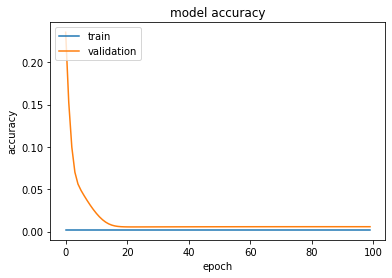

In [102]:
print(trend_history.history.keys())
#  "Accuracy"
plt.plot(trend_hist.history['accuracy'])
plt.plot(trend_history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

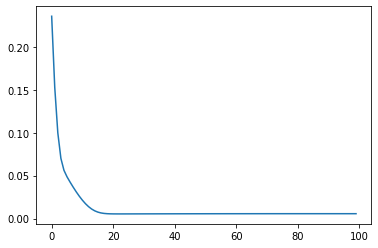

In [103]:
plt.plot(trend_history.history['loss'])

In [106]:
# The Italia positivi dataset

In [ ]:
for i in X:
  print(i)

In [ ]:
positivi_history = GRU.fit(X,y, epochs = 100, batch_size = 128) # Fitting our data to the model

4/4 [==============================] - 0s 4ms/step


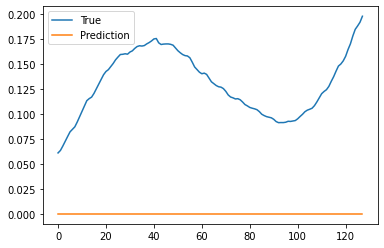

In [109]:
predictions = GRU.predict(y)

pred_data = np.array([115112 ,119230 ,120875 ,123396, 127085, 132513, 137130, 143401 ,148760,151514]) # making a prediction
pred_data = pred_data.reshape(1,X.shape[1])
y_hat = GRU.predict(pred_data, verbose=0)

# Plot the results
plt.plot(y_test, label='True')
plt.plot(predictions[:, 0], label='Prediction')
plt.legend()
plt.show()

In [130]:
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense

# Load the dataset
pos_data = pd.read_csv('Italia-positivi-giornaliero.csv')
# Normalize the data
scaler = MinMaxScaler()
pos_data = scaler.fit_transform(pos_data)

# Split the data into train and test sets
split_index = int(len(pos_data) * 0.8)
x_train, y_train = pos_data[:split_index, :-1], pos_data[:split_index, -1]
x_test, y_test = pos_data[split_index:, :-1], pos_data[split_index:, -1]
print(x_test)
# Reshape the data for the GRU
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))

# Build the model
gru = Sequential()
gru.add(GRU(64, input_shape=(1, x_train.shape[2])))
gru.add(Dense(1))
gru.compile(loss='mean_squared_error', optimizer='adam')

# Fit the model to the training data
GRU_history = gru.fit(x_train, y_train, epochs=10, batch_size=16, validation_data=(x_test, y_test), verbose=2, shuffle=False)


[]
Epoch 1/10
32/32 - 2s - loss: 0.1567 - val_loss: 0.0017 - 2s/epoch - 61ms/step
Epoch 2/10
32/32 - 0s - loss: 0.1200 - val_loss: 0.0047 - 117ms/epoch - 4ms/step
Epoch 3/10
32/32 - 0s - loss: 0.1027 - val_loss: 0.0168 - 86ms/epoch - 3ms/step
Epoch 4/10
32/32 - 0s - loss: 0.0984 - val_loss: 0.0273 - 94ms/epoch - 3ms/step
Epoch 5/10
32/32 - 0s - loss: 0.0985 - val_loss: 0.0330 - 82ms/epoch - 3ms/step
Epoch 6/10
32/32 - 0s - loss: 0.0989 - val_loss: 0.0356 - 81ms/epoch - 3ms/step
Epoch 7/10
32/32 - 0s - loss: 0.0992 - val_loss: 0.0367 - 84ms/epoch - 3ms/step
Epoch 8/10
32/32 - 0s - loss: 0.0992 - val_loss: 0.0372 - 113ms/epoch - 4ms/step
Epoch 9/10
32/32 - 0s - loss: 0.0992 - val_loss: 0.0374 - 83ms/epoch - 3ms/step
Epoch 10/10
32/32 - 0s - loss: 0.0991 - val_loss: 0.0375 - 85ms/epoch - 3ms/step


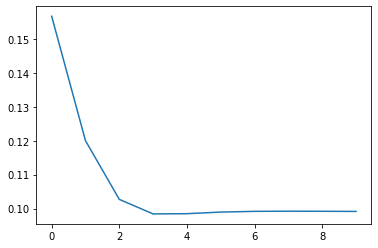

In [131]:
plt.plot(GRU_history.history['loss'])